# SIA

##### @author: Anne Hermann

## Overview: 
    Set up variables for the SIA model.
    Create the geometry on an artifical ice sheet and discretize it. 
    Plot initial velocity field and heights over time.
    
    Assumption: 1. velocity at base is equal to zero.
                2. the bed is constant along the x axis.
                3. height at left and right boundary is zero

In [38]:
import SIA as sia
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [39]:
# Enable interactive notebook
%matplotlib notebook

In [40]:
# --------------------------  initialize variables  -------------------------- 
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 10E-16      # a^-1 Pa^-3 
g = 9.81        # m s^-2

In [41]:
# -------------------------      Discretization      ------------------------- 
# grid in x dir.
delta_x = 5
x_lim = 100
bed = np.arange(-x_lim,x_lim+1,delta_x)

# time discretization
t_0=0
N=50
delta_t=100

In [42]:
# ----------------------------     Elevation      ----------------------------
#TODO: look for a better initial ice sheet
surface = -0.001*bed**2+10  

In [43]:
# --------------------------   SIA Solution Plot   --------------------------- 
# calculate solution
#TODO: change boundary cond. in SIA file!
h,v = sia.solution(surface, delta_x, delta_t, t_0, N, n, rho, A, g)

<IPython.core.display.Javascript object>


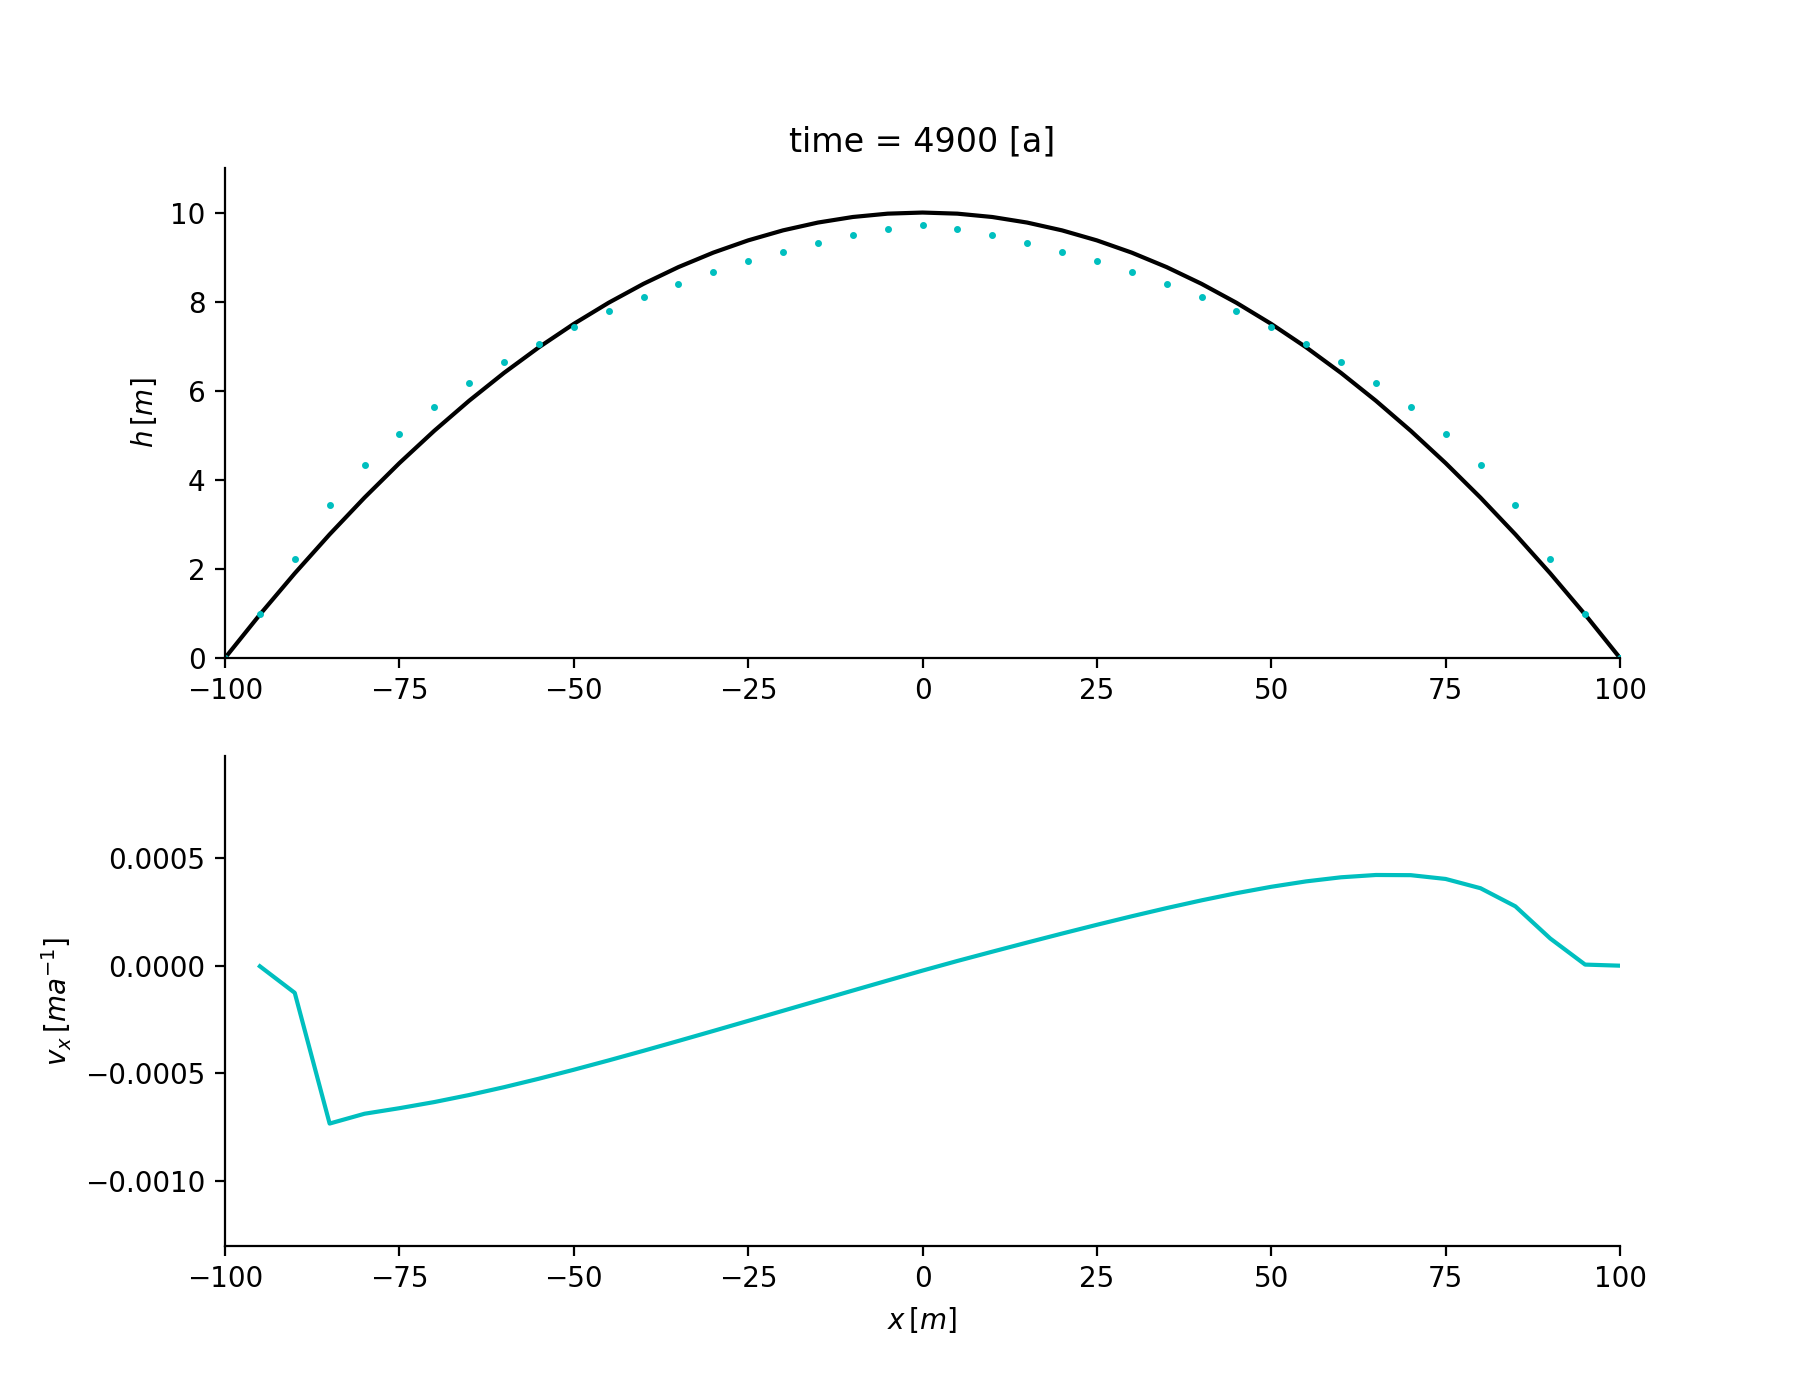

In [63]:
# Create plots
fig,ax=plt.subplots(2,figsize=(9, 7))
ax[0].plot(bed,surface,"k-")
line1,=ax[0].plot([],"c.",markersize=3)
line2,=ax[1].plot([],"c")

ax[0].set_xlim(-100,100)
ax[0].set_ylim(0,11)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

v_min = np.min(v)
v_max = np.max(v)

ax[1].set_xlim(-100,100)
ax[1].set_ylim([v_min, v_max])
ax[1].set(ylabel=r"$v_x\,[ma^{-1}]$",xlabel=r"$x\,[m]$")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

def animate_h(frame_num):
    ax[0].set(title = f"time = {t_0+frame_num*delta_t} [a]",ylabel=r"$h\,[m]$")
    line1.set_data((bed,h[frame_num]))
    return line1

def animate_v(frame_num):
    line2.set_data((bed[1:len(bed)],v[frame_num]))
    return line2

anim1=FuncAnimation(fig,animate_h,frames=N,repeat=False)
anim2=FuncAnimation(fig,animate_v,frames=N,repeat=False)
plt.show()